In [1]:
# Import des bibliothèques de base pour la manipulation des données et les visualisations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import des bibliothèques de traitement de texte
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from bs4 import BeautifulSoup
import re
import os

# Import des bibliothèques pour la modélisation et le traitement de texte avancé
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import sentence_transformers
from sentence_transformers import SentenceTransformer
import torch
import itertools
import gensim

# Import des bibliothèques pour le prétraitement et la modélisation des données
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.multioutput import ClassifierChain
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import LatentDirichletAllocation
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Import des bibliothèques pour la visualisation de modèles et l'affichage dans Jupyter Notebook
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from IPython.core.display import display, HTML

# Import des bibliothèques pour la sauvegarde et le chargement de modèles
import pickle
from gensim.models import FastText
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Import des bibliothèques pour l'évaluation des modèles
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score

# Import des bibliothèques pour le suivi des expériences de machine learning
import mlflow
import mlflow.sklearn
import mlflow.pytorch
import mlflow.tensorflow

# Import des bibliothèques pour le traitement du langage naturel avec Transformers
from transformers import BertTokenizer, BertModel

# Import des bibliothèques pour l'utilisation de TensorFlow et TensorFlow Hub
import tensorflow_hub as hub
import tensorflow as tf


C:\Users\ouedraogo080976\AppData\Local\anaconda\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


C:\Users\ouedraogo080976\AppData\Local\Temp\ipykernel_14812\1184527746.py:39: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
# Téléchargement de la ressource nécessaire pour nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ouedraogo080976\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ouedraogo080976\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ouedraogo080976\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ouedraogo080976\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
data = pd.read_csv('dataclean.csv')
data.head()

,Unnamed: 0,TitleBody,new_tags,TitleBody_bow,TitleBody_bow_lem,TitleBody_dl
0,0,How to convert Decimal to Double in C\n\nI wan...,['c#'],how convert decimal double want assign decimal...,how convert decimal double want assign decimal...,how to convert decimal to double in c i want t...
1,1,Calculate relative time in C\n\nGiven a specif...,['c#'],calculate relative time given specific datetim...,calculate relative time given specific datetim...,calculate relative time in c given a specific ...
2,2,Determine a user s timezone\n\nIs there a stan...,['html'],determine user timezone standard way web serve...,determine user timezone standard way web serve...,determine a user s timezone is there a standar...
3,4,How to use the C socket API in C on z OS\n\n...,"['c++', 'c']",how use socket api issues getting sockets api ...,how use socket api issue getting socket api wo...,how to use the c socket api in c on z os i m h...
4,6,Decoding T SQL CAST in C VB NET\n\nRecently o...,['c#'],decoding sql cast net recently site deluged re...,decoding sql cast net recently site deluged re...,decoding t sql cast in c vb net recently our s...


### Bag of Words

Le modèle Bag of Words apprend un vocabulaire à partir de tous les documents, puis modélise chaque document en comptant le nombre de fois où chaque mot apparaît, convertissant donc les données textuelles en données numériques.

Le modèle Bag of Words est une approche simple pour représenter des textes en tant que vecteurs numériques. 

Dans ce modèle, un texte est représenté par un vecteur où chaque dimension correspond à un mot unique du vocabulaire et la valeur de chaque dimension représente la fréquence d'apparition de ce mot dans le texte. 

Le modèle ignore la structure grammaticale et l'ordre des mots, se concentrant uniquement sur les mots eux-mêmes et leur fréquence.

Nous utilisons CountVectorizer pour transformer les textes en représentations vectorielles, puis comptons la fréquence des tokens.

In [19]:
# Initialiser le vectorizer
vectorizer = CountVectorizer()

# Ajuster et transformer les données
X_bow = vectorizer.fit_transform(data['TitleBody_bow_lem'])

# Récupérer les mots du vocabulaire
vocab = vectorizer.get_feature_names_out()

# Compter la fréquence des tokens
token_counts = X_bow.toarray().sum(axis=0)
token_freq = dict(zip(vocab, token_counts))

# Trier les tokens par fréquence décroissante
sorted_token_freq = sorted(token_freq.items(), key=lambda x: x[1], reverse=True)

# Afficher les 10 tokens lemmatisés les plus fréquents
print(sorted_token_freq[:10])

[('java', 31741), ('class', 27999), ('android', 27682), ('file', 26248), ('using', 26120), ('code', 22557), ('error', 21414), ('new', 20720), ('get', 20540), ('return', 19876)]


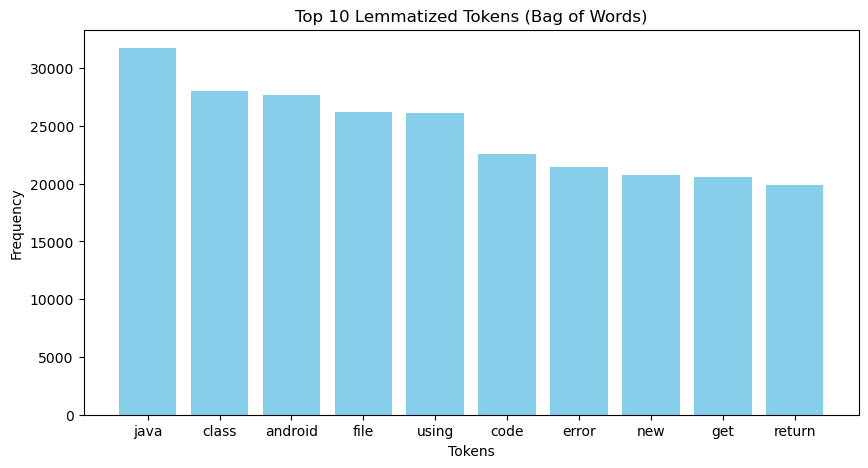

In [20]:
# Extraire les tokens et leurs fréquences
tokens, counts = zip(*sorted_token_freq[:10])

# Créer le graphique à barres
plt.figure(figsize=(10, 5))
plt.bar(tokens, counts, color='skyblue')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title('Top 10 Lemmatized Tokens (Bag of Words)')
plt.show()

## APPROCHE SUPERVISEE: Régression logistique avec multi-labels, logisitic regression + classifier chain 

La régression logistique et les chaînes de classifieurs sont souvent utilisées ensemble pour résoudre des problèmes de classification multi-étiquettes

**Régression Logistique**

La régression logistique est une méthode d'analyse de régression utilisée pour prédire l'issue d'une variable dépendante catégorielle à partir d'une ou plusieurs variables prédictives. Elle est principalement utilisée pour la classification binaire, mais peut être étendue à la classification multi-classes en utilisant des techniques comme "one-vs-rest" (OvR) ou "one-vs-one" (OvO).

**Chaîne de Classifieurs**

La chaîne de classifieurs est une méthode pour traiter les problèmes de classification multi-étiquettes. Elle consiste à entraîner une séquence de classifieurs, chaque classifieur s'occupant d'un problème de classification binaire. L'idée clé est d'utiliser les prédictions des classifieurs précédents comme caractéristiques supplémentaires pour les classifieurs suivants


**Comment Ils Fonctionnent Ensemble**

**Séquence de Classifieurs** : Dans une chaîne de classifieurs, vous entraînez un modèle de régression logistique pour chaque étiquette. L'ordre des classifieurs est généralement choisi de manière arbitraire ou basé sur une heuristique.

**Extension des Caractéristiques** : Lors de la prédiction des étiquettes pour une nouvelle instance, le premier modèle de régression logistique prédit la première étiquette. Cette prédiction est ensuite utilisée comme une caractéristique supplémentaire pour le deuxième modèle de régression logistique, qui prédit la deuxième étiquette, et ainsi de suite.

**Prédiction** : Pendant la prédiction, la chaîne de classifieurs fait des prédictions séquentiellement, chaque modèle utilisant les prédictions des modèles précédents comme caractéristiques d'entrée supplémentaires.

### Contexte
Nous allons ici développer un algorithme de Machine Learning destiné à assigner automatiquement plusieurs tags pertinents à une question posée sur le célébre site Stack overflow.     
Ce programme s'adresse principalement aux nouveaux utilisateurs, afin de leur suggérer quelques tags relatifs à la question qu'ils souhaitent poser.

### Les données sources
Les données ont été cleanées dans le Notebook Exploration Dans ce nettoyage ont par exemple été appliquées les techniques de stop words, suppression de la ponctuation et des liens, tokenisation, lemmatisation ...

### Objectif de ce Notebook
Dans ce Notebook, nous allons traiter la partie **modélisation des données textuelles avec des modèles  supervisés**.   

### Bag of Words

Le modèle Bag of Words est une approche simple pour représenter des textes en tant que vecteurs numériques. 

Dans ce modèle, un texte est représenté par un vecteur où chaque dimension correspond à un mot unique du vocabulaire et la valeur de chaque dimension représente la fréquence d'apparition de ce mot dans le texte. 

Le modèle ignore la structure grammaticale et l'ordre des mots, se concentrant uniquement sur les mots eux-mêmes et leur fréquence.

In [24]:
# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the list of categories to a binary matrix
Y = mlb.fit_transform(data['new_tags'])
Y

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [25]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_bow, Y, test_size=0.2, random_state=42)

In [26]:
# Initialize the base classifier
base_classifier = LogisticRegression()

# Initialize the Classifier Chain
chain = ClassifierChain(base_classifier)

# Fit the model
chain.fit(X_train, y_train)

# Make predictions
y_pred_chain = chain.predict(X_test)

# Evaluate the model
accuracy_chain = accuracy_score(y_test, y_pred_chain)
f1_chain = f1_score(y_test, y_pred_chain, average='micro')

print(f"Chain Accuracy: {accuracy_chain}")
print(f"Chain F1 Score: {f1_chain}")

C:\Users\ouedraogo080976\AppData\Local\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ouedraogo080976\AppData\Local\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

Chain Accuracy: 0.6938931297709924
Chain F1 Score: 0.8012896894932361


### mlflow

MLflow est une plateforme open source conçue pour rationaliser le cycle de vie de l'apprentissage automatique, englobant les étapes allant de la préparation des données au déploiement et au-delà. 

Elle propose une suite d'outils pour gérer ce cycle de vie, en mettant l'accent sur la reproductibilité, l'évolutivité et la collaboration

MFFLOW permet de gerer tous les processus de création de modèle de machine learning.

In [27]:
# Définir l'URI de suivi MLflow et le nom de l'expérience
mlflow.set_tracking_uri("http://127.0.0.1:5000")  # Définir l'URI de suivi MLflow
mlflow.set_experiment("Bag of Words Supervised")  # Définir le nom de votre expérience MLflow

# Assurez-vous que les données X_bow et data['new_tags'] sont définies avant cette section.

# Binariser les labels
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(data['new_tags'])

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_bow, Y, test_size=0.2, random_state=42)

# Initialiser le classifieur de base
base_classifier = LogisticRegression()

# Initialiser la chaîne de classifieurs
chain = ClassifierChain(base_classifier)

# Débuter une nouvelle session de suivi avec MLflow
with mlflow.start_run():
    # Entraîner le modèle
    chain.fit(X_train, y_train)

    # Faire des prédictions
    y_pred_chain = chain.predict(X_test)

    # Évaluer le modèle
    accuracy_chain = accuracy_score(y_test, y_pred_chain)
    f1_chain = f1_score(y_test, y_pred_chain, average='micro')

    # Enregistrer les métriques dans MLflow
    mlflow.log_metric("accuracy", accuracy_chain)
    mlflow.log_metric("f1_score", f1_chain)

    # Enregistrer le modèle dans MLflow
    mlflow.sklearn.log_model(chain, "model")

    print(f"Chain Accuracy: {accuracy_chain}")
    print(f"Chain F1 Score: {f1_chain}")

# Pour visualiser les résultats, exécutez `mlflow ui` dans votre terminal et allez à l'adresse http://localhost:5000.

C:\Users\ouedraogo080976\AppData\Local\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ouedraogo080976\AppData\Local\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

Chain Accuracy: 0.6938931297709924
Chain F1 Score: 0.8012896894932361


### SBERT

SBERT (Sentence-BERT) est une méthode pour comprendre la similarité entre phrases. Au lieu de juste regarder des mots individuellement, SBERT regarde une phrase entière et la transforme en un vecteur (une série de nombres). Ensuite, il compare ces vecteurs pour dire à quel point deux phrases sont similaires.

In [28]:
sentences = data['TitleBody_dl'].values.tolist()

# Charger le modèle SBERT
model_name = 'all-MiniLM-L6-v2'
model = SentenceTransformer(model_name)

# Encoder les phrases avec SBERT
SBERT = model.encode(sentences)

In [29]:
SBERT.shape

(32749, 384)

In [30]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(SBERT, Y, test_size=0.2, random_state=42)

# Initialiser le classifieur de base
base_classifier = LogisticRegression()

# Initialiser la Classifier Chain avec le classifieur de base
chain_classifier = ClassifierChain(base_classifier)

# Entraîner le modèle
chain_classifier.fit(X_train, y_train)

# Faire des prédictions
y_pred_chain = chain_classifier.predict(X_test)

# Evaluate the model
accuracy_chain = accuracy_score(y_test, y_pred_chain)
f1_chain = f1_score(y_test, y_pred_chain, average='micro')

print(f"Chain Accuracy: {accuracy_chain}")
print(f"Chain F1 Score: {f1_chain}")

Chain Accuracy: 0.7570992366412214
Chain F1 Score: 0.8317010488296173


In [31]:
# Définir l'URI de suivi MLflow et le nom de l'expérience
mlflow.set_tracking_uri("http://127.0.0.1:5000")  # Définir l'URI de suivi MLflow
mlflow.set_experiment("SBERT_Supervised")  # Définir le nom de votre expérience MLflow

# Charger les phrases et les encoder avec SBERT
sentences = data['TitleBody_dl'].values.tolist()
model_name = 'all-MiniLM-L6-v2'
model = SentenceTransformer(model_name)
SBERT = model.encode(sentences)

# Binariser les labels
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(data['new_tags'])

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(SBERT, Y, test_size=0.2, random_state=42)

# Initialiser le classifieur de base
base_classifier = LogisticRegression()

# Initialiser la Classifier Chain avec le classifieur de base
chain_classifier = ClassifierChain(base_classifier)

# Débuter une nouvelle session de suivi avec MLflow
with mlflow.start_run():
    # Entraîner le modèle
    chain_classifier.fit(X_train, y_train)

    # Faire des prédictions
    y_pred_chain = chain_classifier.predict(X_test)

    # Évaluer le modèle
    accuracy_chain = accuracy_score(y_test, y_pred_chain)
    f1_chain = f1_score(y_test, y_pred_chain, average='micro')

    # Enregistrer les métriques dans MLflow
    mlflow.log_metric("accuracy", accuracy_chain)
    mlflow.log_metric("f1_score", f1_chain)

    # Enregistrer le modèle de chaîne de classifieurs dans MLflow
    mlflow.sklearn.log_model(chain_classifier, "chain_classifier")

    # Sauvegarder et enregistrer le modèle SBERT
    model_path = "sbert_model.pkl"
    with open(model_path, 'wb') as f:
        pickle.dump(model, f)
    
    mlflow.log_artifact(model_path)

    print(f"Chain Accuracy: {accuracy_chain}")
    print(f"Chain F1 Score: {f1_chain}")

# Pour visualiser les résultats, exécutez `mlflow ui` dans votre terminal et allez à l'adresse http://localhost:5000.

C:\Users\ouedraogo080976\AppData\Local\anaconda\Lib\site-packages\mlflow\models\model.py:321: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.utc_time_created = str(utc_time_created or datetime.utcnow())


Chain Accuracy: 0.7570992366412214
Chain F1 Score: 0.8317010488296173


### USE (Universal Sentence Encoder)

USE est un modèle développé par Google qui génère des embeddings de phrases et de textes. 

Contrairement à BERT, USE est conçu pour être simple et efficace, avec une attention particulière à la représentation des phrases et des textes de manière qui facilite des tâches telles que la recherche sémantique et la similarité de texte

In [34]:
# Définir l'URI de suivi MLflow et le nom de l'expérience
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("USE_Supervised")

# Charger le modèle USE depuis TensorFlow Hub
use_model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
use_model = hub.load(use_model_url)

# Fonction pour encoder les phrases avec USE
def encode_sentences(sentences):
    return use_model(sentences).numpy()

# Préparer les données
# Assurez-vous que `data` est défini et contient les colonnes 'TitleBody_dl' et 'new_tags'
sentences = data['TitleBody_dl'].values.tolist()
X_use = encode_sentences(sentences)

# Binariser les étiquettes
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['new_tags'])

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_use, y, test_size=0.2, random_state=42)

# Débuter une nouvelle session de suivi avec MLflow
with mlflow.start_run():
    # Entraîner la régression logistique avec chaîne de classifieurs
    base_lr = LogisticRegression(solver='lbfgs', max_iter=1000)
    chain = ClassifierChain(base_lr)
    chain.fit(X_train, y_train)

    # Prédire sur l'ensemble de test
    y_pred = chain.predict(X_test)

    # Évaluer les performances
    accuracy_chain = accuracy_score(y_test, y_pred)
    f1_chain = f1_score(y_test, y_pred, average='micro')

    # Enregistrer les métriques dans MLflow
    mlflow.log_metric("accuracy", accuracy_chain)
    mlflow.log_metric("f1_score", f1_chain)

    # Sauvegarder le modèle USE en tant qu'artefact
    use_model_dir = "use_model"
    os.makedirs(use_model_dir, exist_ok=True)
    
    # Note: TensorFlow Hub model cannot be directement sauvegardé. Utilisez ce placeholder ou une méthode alternative si nécessaire.
    with open(os.path.join(use_model_dir, "use_model.txt"), 'w') as f:
        f.write("Universal Sentence Encoder model")

    mlflow.log_artifact(use_model_dir)

    # Enregistrer le modèle de chaîne de classifieurs dans MLflow
    mlflow.sklearn.log_model(chain, "chain_classifier")

    print(f"Chain Accuracy: {accuracy_chain}")
    print(f"Chain F1 Score: {f1_chain}")

# Pour visualiser les résultats, exécutez `mlflow ui` dans votre terminal et allez à l'adresse http://localhost:5000.


C:\Users\ouedraogo080976\AppData\Local\anaconda\Lib\site-packages\mlflow\models\model.py:321: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.utc_time_created = str(utc_time_created or datetime.utcnow())


Chain Accuracy: 0.7586259541984732
Chain F1 Score: 0.8297119055883374


### FastText

FastText est une extension de Word2Vec qui prend en compte les sous-mots, ce qui est utile pour traiter les mots inconnus ou mal orthographiés.

In [35]:
param_grid = {
    'vector_size': [50, 100, 150],  # Dimensions des vecteurs
    'window': [3, 5, 7],            # Taille de la fenêtre de contexte
    'min_count': [1, 2, 3],         # Nombre minimal d'occurrences
    'workers': [1, 4]               # Nombre de threads
}

In [36]:
# Fonction de recherche de grille pour FastText
def grid_search_fasttext(param_grid, sentences):
    best_model = None
    best_params = None
    best_score = float('-inf')

    all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

    for params in all_params:
        model = FastText(
            sentences=sentences,
            vector_size=params['vector_size'],
            window=params['window'],
            min_count=params['min_count'],
            workers=params['workers']
        )

        # Évaluer le modèle par la cohérence de regroupement
        words = list(model.wv.index_to_key)
        word_vectors = [model.wv[word] for word in words]

        # Clustering des vecteurs de mots
        num_clusters = min(len(words), 10)
        kmeans = KMeans(n_clusters=num_clusters, random_state=0)
        kmeans.fit(word_vectors)
        labels = kmeans.labels_

        # Calculer le score de silhouette pour la cohérence de regroupement
        silhouette_avg = silhouette_score(word_vectors, labels)

        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_model = model
            best_params = params

    return best_model, best_params, best_score

# Préparer les phrases pour FastText
sentences = data['TitleBody_bow_lem'].tolist()

# Effectuer la recherche de grille
best_model, best_params, best_score = grid_search_fasttext(param_grid, sentences)

print("Meilleurs paramètres :", best_params)
print("Meilleur score de cohérence de regroupement :", best_score)

C:\Users\ouedraogo080976\AppData\Local\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\ouedraogo080976\AppData\Local\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\ouedraogo080976\AppData\Local\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ouedraogo080976\AppData\Local\anaconda\Lib\site-packages\s

Meilleurs paramètres : {'vector_size': 100, 'window': 7, 'min_count': 3, 'workers': 4}
Meilleur score de cohérence de regroupement : 0.47885942


C:\Users\ouedraogo080976\AppData\Local\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [39]:
# Créer des vecteurs de documents en utilisant FastText
def document_vector_ft(model, doc):
    # Moyenne des vecteurs de mots présents dans le document
    doc = [word for word in doc if word in model.wv.index_to_key]
    if len(doc) == 0:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[doc], axis=0)

# Appliquer la fonction à chaque document
data['TitleBody_Vector_FT'] = data['TitleBody_bow_lem'].apply(lambda x: document_vector_ft(best_model, x))

# Créer la matrice de caractéristiques
X_fasttext = np.array(data['TitleBody_Vector_FT'].tolist())

# Binariser les étiquettes
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['new_tags'])

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_fasttext, y, test_size=0.2, random_state=42)

# Entraîner la régression logistique avec chaîne de classifieurs
base_lr = LogisticRegression(solver='lbfgs', max_iter=1000)
chain = ClassifierChain(base_lr)
chain.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = chain.predict(X_test)

# Évaluer les performances avec le score F1
accuracy_chain = accuracy_score(y_test, y_pred)
f1_chain = f1_score(y_test, y_pred, average='micro')

print(f"Chain Accuracy: {accuracy_chain}")
print(f"Chain F1 Score: {f1_chain}")

C:\Users\ouedraogo080976\AppData\Local\Temp\ipykernel_19844\776988051.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TitleBody_Vector_FT'] = data['TitleBody_bow_lem'].apply(lambda x: document_vector_ft(best_model, x))


Chain Accuracy: 0.27053435114503815
Chain F1 Score: 0.2885920422887349


In [40]:
# Définir l'URI de suivi MLflow et le nom de l'expérience
mlflow.set_tracking_uri("http://127.0.0.1:5000")  # Définir l'URI de suivi MLflow
mlflow.set_experiment("fasttext_Supervised")  # Définir le nom de votre expérience MLflow

# Créer des vecteurs de documents en utilisant FastText
def document_vector_ft(model, doc):
    # Moyenne des vecteurs de mots présents dans le document
    doc = [word for word in doc if word in model.wv.index_to_key]
    if len(doc) == 0:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[doc], axis=0)

# Assurez-vous que 'best_model' est défini et que les données sont prétraitées avant cette section.
data['TitleBody_Vector_FT'] = data['TitleBody_bow_lem'].apply(lambda x: document_vector_ft(best_model, x))

# Créer la matrice de caractéristiques
X_fasttext = np.array(data['TitleBody_Vector_FT'].tolist())

# Binariser les étiquettes
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['new_tags'])

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_fasttext, y, test_size=0.2, random_state=42)

# Débuter une nouvelle session de suivi avec MLflow
with mlflow.start_run():
    # Entraîner la régression logistique avec chaîne de classifieurs
    base_lr = LogisticRegression(solver='lbfgs', max_iter=1000)
    chain = ClassifierChain(base_lr)
    chain.fit(X_train, y_train)

    # Prédire sur l'ensemble de test
    y_pred = chain.predict(X_test)

    # Évaluer les performances
    accuracy_chain = accuracy_score(y_test, y_pred)
    f1_chain = f1_score(y_test, y_pred, average='micro')

    # Enregistrer les métriques dans MLflow
    mlflow.log_metric("accuracy", accuracy_chain)
    mlflow.log_metric("f1_score", f1_chain)

    # Enregistrer le modèle de chaîne de classifieurs dans MLflow
    mlflow.sklearn.log_model(chain, "chain_classifier")

    # Sauvegarder et enregistrer le modèle FastText
    fasttext_model_path = "fasttext_model.pkl"
    with open(fasttext_model_path, 'wb') as f:
        pickle.dump(best_model, f)
    
    mlflow.log_artifact(fasttext_model_path)

    print(f"Chain Accuracy: {accuracy_chain}")
    print(f"Chain F1 Score: {f1_chain}")

# Pour visualiser les résultats, exécutez `mlflow ui` dans votre terminal et allez à l'adresse http://localhost:5000.

C:\Users\ouedraogo080976\AppData\Local\Temp\ipykernel_19844\2149654391.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TitleBody_Vector_FT'] = data['TitleBody_bow_lem'].apply(lambda x: document_vector_ft(best_model, x))
C:\Users\ouedraogo080976\AppData\Local\anaconda\Lib\site-packages\mlflow\models\model.py:321: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.utc_time_created = str(utc_time_created or datetime.utcnow())


Chain Accuracy: 0.27053435114503815
Chain F1 Score: 0.2885920422887349


### Doc2Vec

Contrairement à Word2Vec qui génère des vecteurs pour des mots, Doc2Vec génère des vecteurs pour des documents (paragraphes ou phrases). Cette méthode est particulièrement utile pour obtenir des représentations vectorielles de documents entiers

In [19]:
def create_tagged_documents(df):
    tagged_documents = []
    for i, row in df.iterrows():
        tokens = row['TitleBody_bow_lem']
        tagged_documents.append(TaggedDocument(words=tokens, tags=[i]))
    return tagged_documents

tagged_documents = create_tagged_documents(data)

In [20]:
# Définir la grille de paramètres pour Doc2Vec
param_grid = {
    'vector_size': [50, 100, 150],  # Dimensions des vecteurs
    'window': [3, 5, 7],            # Taille de la fenêtre de contexte
    'min_count': [1, 2, 3],         # Nombre minimal d'occurrences
    'workers': [1, 4]               # Nombre de threads
}

# Fonction de recherche de grille pour Doc2Vec
def grid_search_doc2vec(param_grid, tagged_documents):
    best_model = None
    best_params = None
    best_score = float('-inf')

    all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

    for params in all_params:
        model = Doc2Vec(
            documents=tagged_documents,
            vector_size=params['vector_size'],
            window=params['window'],
            min_count=params['min_count'],
            workers=params['workers'],
            epochs=20  # Ajuster le nombre d'epochs selon les besoins
        )

        # Évaluer le modèle par la cohérence de regroupement
        doc_vectors = [model.dv[i] for i in range(len(tagged_documents))]
        
        # Clustering des vecteurs de documents
        num_clusters = min(len(doc_vectors), 10)
        kmeans = KMeans(n_clusters=num_clusters, random_state=0)
        kmeans.fit(doc_vectors)
        labels = kmeans.labels_

        # Calculer le score de silhouette pour la cohérence de regroupement
        silhouette_avg = silhouette_score(doc_vectors, labels)

        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_model = model
            best_params = params

    return best_model, best_params, best_score

# Préparer les phrases pour Doc2Vec
tagged_documents = create_tagged_documents(data)

# Effectuer la recherche de grille
best_model, best_params, best_score = grid_search_doc2vec(param_grid, tagged_documents)

print("Meilleurs paramètres :", best_params)
print("Meilleur score de cohérence de regroupement :", best_score)

Meilleurs paramètres : {'vector_size': 150, 'window': 7, 'min_count': 1, 'workers': 4}
Meilleur score de cohérence de regroupement : 0.21658728


In [21]:
# Créer des vecteurs de documents en utilisant Doc2Vec
def get_document_vector(model, doc_id):
    return model.dv[doc_id]

# Appliquer la fonction à chaque document
data['Doc2Vec_Vector'] = data.index.map(lambda x: get_document_vector(best_model, x))

# Créer la matrice de caractéristiques
X_doc2vec = np.array(data['Doc2Vec_Vector'].tolist())

# Binariser les étiquettes
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['new_tags'])

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_doc2vec, y, test_size=0.2, random_state=42)

# Entraîner la régression logistique avec chaîne de classifieurs
base_lr = LogisticRegression(solver='lbfgs', max_iter=1000)
chain = ClassifierChain(base_lr)
chain.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = chain.predict(X_test)

# Évaluer les performances avec le score F1
accuracy_chain = accuracy_score(y_test, y_pred)
f1_chain = f1_score(y_test, y_pred, average='micro')

print(f"Chain Accuracy: {accuracy_chain}")
print(f"Chain F1 Score: {f1_chain}")

C:\Users\ouedraogo080976\AppData\Local\Temp\ipykernel_20632\4189219867.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Doc2Vec_Vector'] = data.index.map(lambda x: get_document_vector(best_model, x))


Chain Accuracy: 0.2381679389312977
Chain F1 Score: 0.2582390205708591


In [22]:
# Définir l'URI de suivi MLflow et le nom de l'expérience
mlflow.set_tracking_uri("http://127.0.0.1:5000")  # Définir l'URI de suivi MLflow
mlflow.set_experiment("doc2vec_Supervised")  # Définir le nom de votre expérience MLflow

# Créer des vecteurs de documents en utilisant Doc2Vec
def get_document_vector(model, doc_id):
    return model.dv[doc_id]

# Assurez-vous que 'best_model' est défini et que les données sont prétraitées avant cette section.
data['Doc2Vec_Vector'] = data.index.map(lambda x: get_document_vector(best_model, x))

# Créer la matrice de caractéristiques
X_doc2vec = np.array(data['Doc2Vec_Vector'].tolist())

# Binariser les étiquettes
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['new_tags'])

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_doc2vec, y, test_size=0.2, random_state=42)

# Débuter une nouvelle session de suivi avec MLflow
with mlflow.start_run():
    # Entraîner la régression logistique avec chaîne de classifieurs
    base_lr = LogisticRegression(solver='lbfgs', max_iter=1000)
    chain = ClassifierChain(base_lr)
    chain.fit(X_train, y_train)

    # Prédire sur l'ensemble de test
    y_pred = chain.predict(X_test)

    # Évaluer les performances
    accuracy_chain = accuracy_score(y_test, y_pred)
    f1_chain = f1_score(y_test, y_pred, average='micro')

    # Enregistrer les métriques dans MLflow
    mlflow.log_metric("accuracy", accuracy_chain)
    mlflow.log_metric("f1_score", f1_chain)

    # Sauvegarder et enregistrer le modèle Doc2Vec
    doc2vec_model_path = "doc2vec_model.pkl"
    with open(doc2vec_model_path, 'wb') as f:
        pickle.dump(best_model, f)

    mlflow.log_artifact(doc2vec_model_path)

    # Enregistrer le modèle de chaîne de classifieurs dans MLflow
    mlflow.sklearn.log_model(chain, "chain_classifier")

    print(f"Chain Accuracy: {accuracy_chain}")
    print(f"Chain F1 Score: {f1_chain}")

# Pour visualiser les résultats, exécutez `mlflow ui` dans votre terminal et allez à l'adresse http://localhost:5000.

C:\Users\ouedraogo080976\AppData\Local\Temp\ipykernel_20632\4075046560.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Doc2Vec_Vector'] = data.index.map(lambda x: get_document_vector(best_model, x))
2024/07/25 12:04:22 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environ

Chain Accuracy: 0.2381679389312977
Chain F1 Score: 0.2582390205708591
